In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# source of data:
# https://www.eia.gov/totalenergy/data/browser/?tbl=T07.02A#/?f=A&start=1949&end=2019&charted=1-3-5-8-14-13
df_raw = pd.read_csv("https://www.eia.gov/totalenergy/data/browser/csv.php?tbl=T07.02A", na_values="Not Available")
df_raw['year'] = df_raw.YYYYMM.astype(str).str.slice(0,4).astype('int64')
filt = df_raw.YYYYMM.astype(str).str.endswith("13")

In [3]:
sources = {
    "coal": "coal",
    "natural gas": "natural gas",
    "Nuclear Electric Power": "nuclear",
    "Conventional Hydroelectric Power": "hydro",
    "wind": "wind",
    "solar": "solar",
}
df = df_raw[filt].pivot("year", "Description", "Value").rename(columns={
    f"Electricity Net Generation From {source.title()}, All Sectors": name
    for source, name  in sources.items()
}).fillna(0)
df.columns.name = 'source'

In [4]:
df = df.drop('Electricity Net Generation Total (including from sources not shown), All Sectors', axis=1)

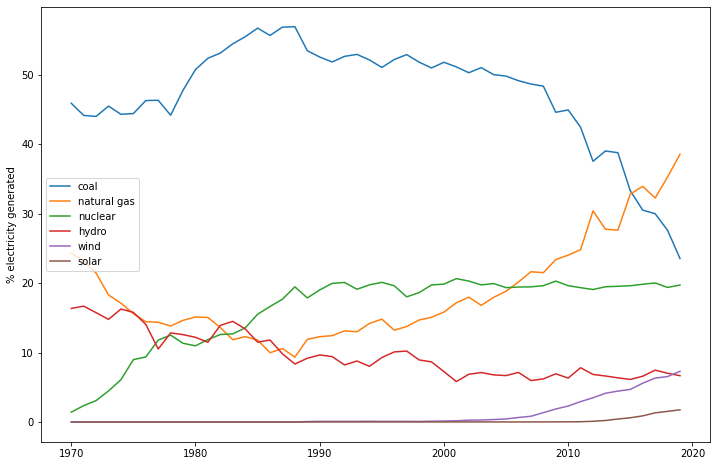

In [12]:
(df[sources.values()].div(df.sum(axis=1), axis=0) * 100).loc[1970:].plot(legend=None, figsize=(12, 8))
plt.xlabel('')
plt.ylabel('% electricity generated')
plt.legend(sources.values(), loc='center left');
plt.savefig('generation-by-type.png')

In [6]:
print(pd.DataFrame({
    year: (df.loc[year] / df.loc[year].sum()).round(3)
    for year in [2010, 2019]
}).loc[sources.values()])

              2010   2019
source                   
coal         0.449  0.235
natural gas  0.240  0.385
nuclear      0.196  0.197
hydro        0.063  0.067
wind         0.023  0.073
solar        0.000  0.018


In [10]:
print(pd.DataFrame({
    year: (df.loc[year]).round()
    for year in [2010, 2019]
}).loc[sources.values()])

                  2010       2019
source                           
coal         1847290.0   966148.0
natural gas   987697.0  1581815.0
nuclear       806968.0   809409.0
hydro         260203.0   273707.0
wind           94652.0   300071.0
solar           1212.0    72234.0


In [8]:
df[sources.values()]

source,coal,natural gas,nuclear,hydro,wind,solar
year,,,,,,
1949,135451.320,36966.709,0.000,94772.992,0.000,0.000
1950,154519.994,44559.159,0.000,100884.575,0.000,0.000
1951,185203.657,56615.678,0.000,104376.120,0.000,0.000
1952,195436.666,68453.088,0.000,109708.251,0.000,0.000
1953,218846.325,79790.975,0.000,109617.396,0.000,0.000
...,...,...,...,...,...,...
2015,1352398.197,1333482.110,797177.877,249080.085,190718.548,24892.904
2016,1239148.654,1378306.934,805693.948,267812.153,226992.562,36054.121
2017,1205835.276,1296442.491,804949.635,300332.930,254302.695,53286.865
